
# Project: Investigate a Dataset of Socio-demographic variables

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

This report focus on finding out influences on the proportion of Females receiving salaries in the World (dependent variable). 

The data is obtained from Gapminder World https://www.gapminder.org/data/.

It takes in consideration whether the following independent variables (influence factors): Female Literacy, GDP per Capita and Life Expectancy at birth have influenced the proportion of female salaried workers.

For the purposes of this report, this are the names and decriptions of the six key variables.

Dependent Variable:
<li>"Female_Salary_Employee": Percentage of females receiving a salary (in percent)

Independent Variables:
<li>"Year": Year the data related to. (year)
<li>"GDP_Per_Capita_USD": Gross Domestic Product per Capita in US Dollars. (in USD)
<li>"Female_Literacy": Percentage of Females being literate. (in percent)
<li>"Life_Expectancy_at_Birth_Years": Life expectancy in years. (in years)

Variable used for data collection or used indirectly:
<li>"Country": Country the data related to. 


In [31]:
#First I will load the necessary packages for this analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [32]:
# Loading the data 
salary_df = pd.read_csv('female_salaried_employee.csv')
literacy_df = pd.read_csv('female_literacy_rate.csv',encoding = "ISO-8859-1")
gdp_df = pd.read_csv('gdp_per_capita_ppp.csv',encoding = "ISO-8859-1")
life_df = pd.read_csv('life_expectancy_at_birth.csv',encoding = "ISO-8859-1")

# encoding = "ISO-8859-1" had to be added to the last three files due to an error of 'utf-8'

In [33]:
#print out a few lines and inspect data
salary_df.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57.700001,NaN,65.800003,49.799999,NaN,NaN,NaN
1,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,82.900002,NaN,66.099998,NaN,NaN,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.5,75.900002,76.400002,76.099998,78.099998,78.599998,78.599998,79.0,80.199997,NaN


In [34]:
literacy_df.head()

,Country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,4.98746,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00000
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.681814,NaN,NaN,95.69148
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.075082,NaN,NaN,NaN,63.918785,NaN,NaN,NaN,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.60846


>Now in this step, since I need each variable as a column, I will melt each of the dataframes in order to have the years as a column.
To make the melt function more efficient, I created a series of years from 1980 to 2011. Furthermore, as the column headers are strings, I will need to convert the series into string. 
Finally, I'll confirm all data have been melted properly.

In [35]:
year = pd.Series(range(1980,2011)).astype(str)
Salary_df2 = pd.melt(salary_df,id_vars=['Country'],value_vars = year,var_name='Year',value_name='Female_Salary_Employee')
Salary_df2.describe()


/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Female_Salary_Employee
count,1519.000000
mean,73.186175
std,21.650123
min,0.800000
25%,60.300001
50%,80.099998
75%,90.350002
max,99.900002


>Continuing wrangling (melting) the other three dataframes as the first one.

In [36]:
literacy_df2 = pd.melt(literacy_df,id_vars=['Country'],value_vars = year,var_name='Year',value_name='Female_Literacy')

gdp_df2 = pd.melt(gdp_df,id_vars=['Country'],value_vars = year,var_name='Year',value_name='GDP_Per_Capita_USD')

life_df2 = pd.melt(life_df,id_vars=['Country'],value_vars = year,var_name='Year',value_name='Life_Expectancy_at_Birth_Years')
life_df2.describe()

,Life_Expectancy_at_Birth_Years
count,6399.000000
mean,67.347704
std,9.245079
min,13.200000
25%,60.715000
50%,69.900000
75%,74.445000
max,84.700000


>In this step I started merging two dataframes together. Then continuining merging the remaining two.

In [37]:
new_df2 = pd.merge(gdp_df2, Salary_df2,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
new_df2.head()

,Country,Year,GDP_Per_Capita_USD,Female_Salary_Employee
0,Abkhazia,1980,NaN,NaN
1,Afghanistan,1980,1158.0,NaN
2,Akrotiri and Dhekelia,1980,NaN,NaN
3,Albania,1980,4218.0,NaN
4,Algeria,1980,10166.0,NaN


In [38]:
new_df3 = pd.merge(literacy_df2, life_df2,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
new_df3.head()

,Country,Year,Female_Literacy,Life_Expectancy_at_Birth_Years
0,Afghanistan,1980,NaN,41.96
1,Albania,1980,NaN,71.39
2,Algeria,1980,NaN,60.92
3,Andorra,1980,NaN,NaN
4,Angola,1980,NaN,46.14


>This is the final dataframe merged.

In [39]:
new_df = pd.merge(new_df2, new_df3,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
new_df.head()

,Country,Year,GDP_Per_Capita_USD,Female_Salary_Employee,Female_Literacy,Life_Expectancy_at_Birth_Years
0,Abkhazia,1980,NaN,NaN,NaN,NaN
1,Afghanistan,1980,1158.0,NaN,NaN,41.96
2,Akrotiri and Dhekelia,1980,NaN,NaN,NaN,NaN
3,Albania,1980,4218.0,NaN,NaN,71.39
4,Algeria,1980,10166.0,NaN,NaN,60.92


>Show  and describe the newly created dataframe for verification.

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8122 entries, 0 to 8121
Data columns (total 6 columns):
Country                           8060 non-null object
Year                              8122 non-null object
GDP_Per_Capita_USD                6283 non-null float64
Female_Salary_Employee            1443 non-null float64
Female_Literacy                   450 non-null float64
Life_Expectancy_at_Birth_Years    6089 non-null float64
dtypes: float64(4), object(2)
memory usage: 444.2+ KB


In [41]:
new_df.describe()

,GDP_Per_Capita_USD,Female_Salary_Employee,Female_Literacy,Life_Expectancy_at_Birth_Years
count,6283.000000,1443.000000,450.000000,6089.000000
mean,14122.331052,73.570062,72.872158,67.448464
std,17801.169605,21.790026,25.379384,9.248460
min,142.000000,0.800000,4.591826,13.200000
25%,2532.000000,60.950001,58.623760,60.770000
50%,7483.000000,81.900002,82.381195,70.000000
75%,18746.000000,90.599998,92.635462,74.530000
max,182668.000000,99.900002,99.790922,84.700000


>This is another quick verification whether the data makes sense. 

In [42]:
new_df.groupby('Country').mean()

,GDP_Per_Capita_USD,Female_Salary_Employee,Female_Literacy,Life_Expectancy_at_Birth_Years
Country,,,,
Abkhazia,NaN,NaN,NaN,NaN
Afghanistan,1139.161290,NaN,NaN,48.869032
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN
Albania,5179.225806,NaN,96.467044,74.175161
Algeria,10543.032258,57.766668,53.277927,70.911290
American Samoa,NaN,98.500000,NaN,71.338095
Andorra,31804.354839,NaN,NaN,83.442857
Angola,4240.935484,NaN,54.194488,51.021935
Anguilla,NaN,74.500000,95.714930,NaN


>Save the file in csv in order to then open it in excel and compare the main dataframe with the original csv files downloaded from Gapaminder World. I checked some numbers to verify again the data has been processed correctly. 

In [43]:
new_df.to_csv('new_df.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - Influence of Literacy, GDP Per Capita and Life Expectancy (IV) on Female Salaried Employee (DV)
Find out more what influence the proportion of female salaried worker.
Does literacy influence the rate of female salaried employee?
Does GDP per capita influence the rate of female salaried employee?
Does life exptancy influence the rate of female salaried employee?

### Evidence One: Analysis - Female Literacy on Female receiving salary

In the following analysis is performed to find out whether female literacy has an influence on female receiving salary. In order to do that I am splitting the data low literacy and high literacy group by a median split. Then the mean of females receiving salary is compared by group.

In [44]:

f_median = new_df['Female_Literacy'].median()

In [45]:
low_literacy = new_df.query('Female_Literacy <@f_median')
high_literacy = new_df.query('Female_Literacy >=@f_median')


In [46]:
low_literacy.mean()

GDP_Per_Capita_USD                8947.964444
Female_Salary_Employee              43.445455
Female_Literacy                     53.218268
Life_Expectancy_at_Birth_Years      63.025778
dtype: float64

In [47]:
high_literacy.mean()

GDP_Per_Capita_USD                18616.923767
Female_Salary_Employee               67.012632
Female_Literacy                      92.526049
Life_Expectancy_at_Birth_Years       72.757973
dtype: float64

### Evidence One: Interpretation
Result - As it can be seen in the median split analysis above, for countries with low literacy 43.45% of female received salaries. For countries with high literacy 67.01% of female received salaries. 

Discussion - This really shows that education is important for females that want to enter the workforce. 

Limitation - It is to be noted that there is missing data and that there is not all data for all countries for all years. It could also be that countries in one year belong to the low literacy group and in another year to the high literacy group.

This is also the reason why I have selected research question two. 

### Evidence Two: Analysis - GDP Per Capita on Female receiving salary

Outline - In the following, analysis is performed to find out whether GDP per Capita has an influence on female receiving salary. In order to do that: 

(1) I am splitting the data into a low GDP and high GDP group by a median split. Then the mean of females receiving salary is compared by the low and high GDP groups. 

(2) For visualization purposes, a bar chart is plotted that compares the proportion of females receiving salary for low and high GDP groups.   

In [48]:
median_gdp = new_df['GDP_Per_Capita_USD'].median()

low_gdp = new_df.query('GDP_Per_Capita_USD < @median_gdp')
high_gdp = new_df.query('GDP_Per_Capita_USD >=@median_gdp')


In [49]:
low_gdp.mean()

GDP_Per_Capita_USD                3020.751035
Female_Salary_Employee              44.325979
Female_Literacy                     59.165373
Life_Expectancy_at_Birth_Years      60.825406
dtype: float64

In [50]:
high_gdp.mean()

GDP_Per_Capita_USD                25220.377785
Female_Salary_Employee               80.518586
Female_Literacy                      86.500164
Life_Expectancy_at_Birth_Years       73.340798
dtype: float64

In [51]:
mean_female_employee_low = low_gdp['Female_Salary_Employee'].mean()
mean_female_employee_high = high_gdp['Female_Salary_Employee'].mean()

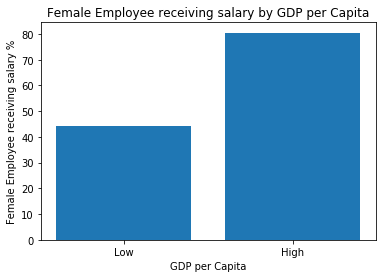

In [52]:
locations = [1, 2]
heights = [mean_female_employee_low, mean_female_employee_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Female Employee receiving salary by GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Female Employee receiving salary %');

### Evidence Two: Interpretation
Result - As it can be seen in the bar chart above, for countries with low GDP per Capita 44.33% of female received salaries. For countries with high GDP per Capita 80.52% of female received salaries.

Discussion - This difference is notable and GDP per Capita seems to be an important factor for the proportion of women at work. Does the economic situation in a country is important for the standing of the women in the working place. 

Limitation - It is to be noted that there is missing data and that there is not all data for all countries for all years. It could also be that countries in one year belong to the low GDP per Capita group and in another year to the high GDP per Capita group.

This is also the reason why I have selected research question two.

### Evidence Three: Analysis - Life expectancy on Females receiving salary 

Outline - In the following, analysis is performed to find out whether Life expectancy at birth has an influence on female receiving salary. In order to do that:

(1) I am creating a scatter plot.

(2) Two more scatter plots are created in order to compare the trends of scatter plot (1) with the trend of GDP per Capita and Female Literacy. 

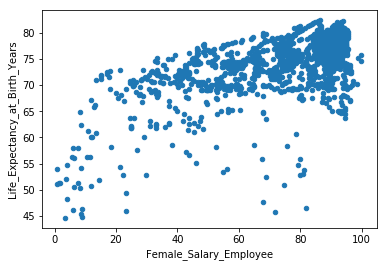

In [53]:
new_df.plot(x='Female_Salary_Employee', y='Life_Expectancy_at_Birth_Years', kind='scatter');


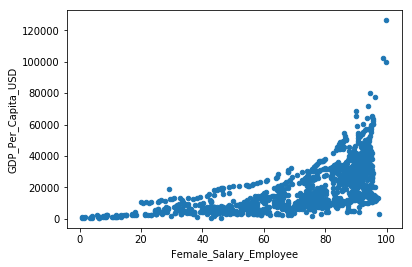

In [54]:
new_df.plot(x='Female_Salary_Employee', y='GDP_Per_Capita_USD', kind='scatter');

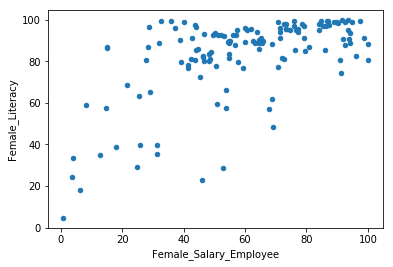

In [55]:
new_df.plot(x='Female_Salary_Employee', y='Female_Literacy', kind='scatter');

### Evidence Three: Interpretation
Result - From the first scatter plot above, we can observe a positive relationship between Life Expectancy at birth and the proportion of female receiving a salary. In order to compare the effect of life expectancy at birth with the other two independent variables, two more scatter plots are shown. 

Discussion - They confirm the analysis of evidence one and evidence two. The weakest influence on the female receiving salaries is the female literacy. 

### Research Question 2 
Has the proportion of female employee receiving salary increased over the years worldwide?

-Group by year and take the average of proportion of females receiving salary.

-Then create a graph showing the results. 


In [56]:
ave_year_df = new_df.groupby('Year', as_index= False).mean()
ave_year_df.head()

,Year,GDP_Per_Capita_USD,Female_Salary_Employee,Female_Literacy,Life_Expectancy_at_Birth_Years
0,1980,12948.975248,80.028572,72.133257,63.308958
1,1981,12565.772277,82.140000,59.066950,63.746042
2,1982,12174.440594,81.906667,60.012698,64.173542
3,1983,12074.945545,77.947059,80.152796,64.536458
4,1984,12197.574257,78.937500,57.135194,64.905156


([<matplotlib.axis.XTick at 0x1174610f0>,
 <a list of 30 Text xticklabel objects>)

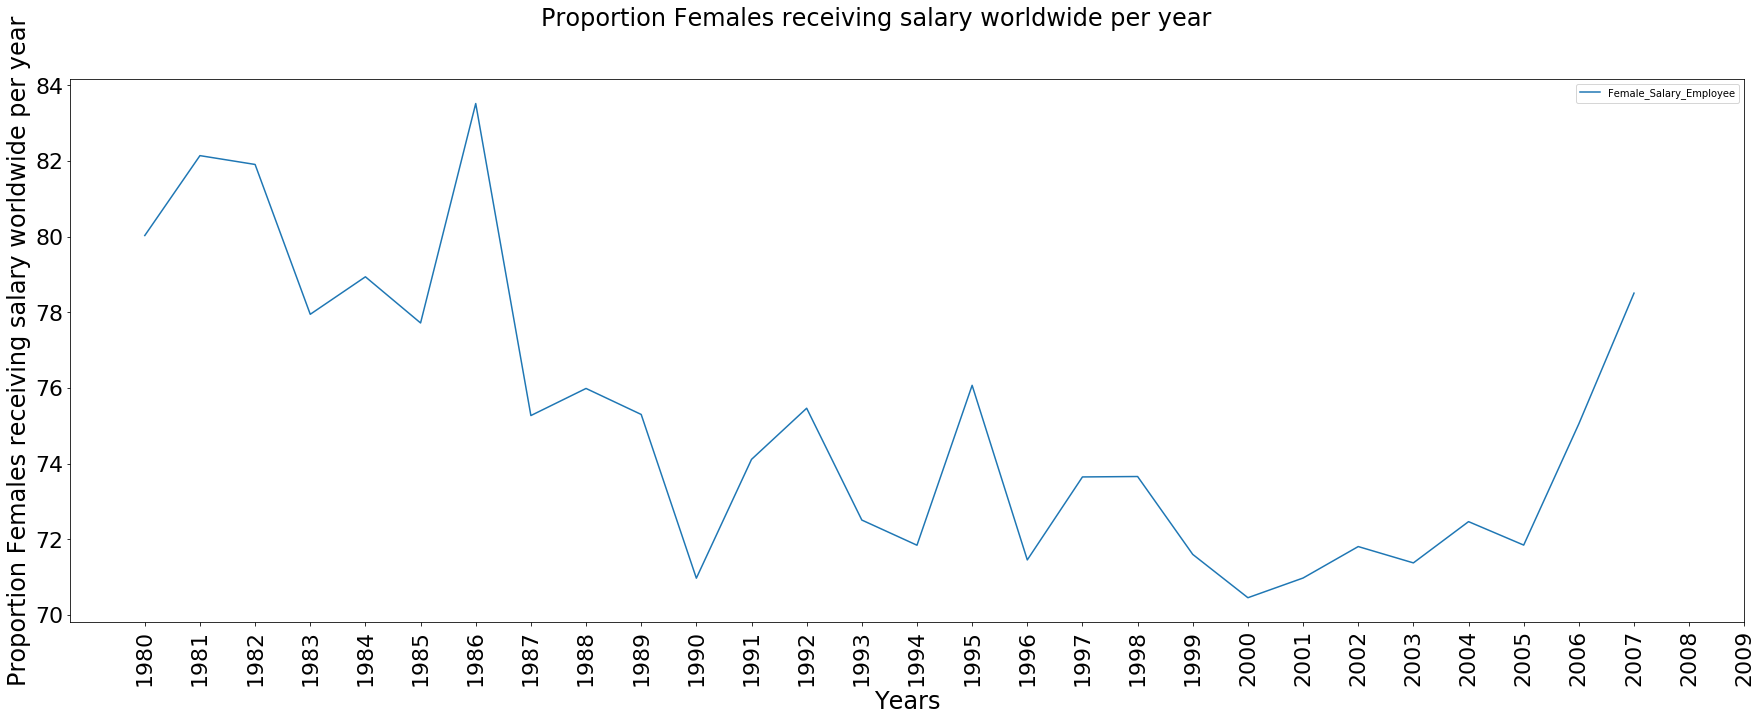

In [57]:
ave_year_df.plot(x='Year', y='Female_Salary_Employee',visible=True,figsize=(30,10))

plt.suptitle('Proportion Females receiving salary worldwide per year ', fontsize=24)
plt.xlabel('Years', fontsize=24)
plt.ylabel('Proportion Females receiving salary worldwide per year', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
x_axis = pd.Series(range(1980,2010)).astype(str)
plt.xticks( np.arange(30), x_axis, rotation = 90 )

### Reasearch Question Two - Interpretation

Result - The average of female employee receiving salary in 1980 was 80.03% and in 2007 was 78.51%. There has been a decrease between the years.

Discussion - The chart shows that there is a decreasing trend until the year 2000 (absolute minimum). 
Since then an increase can be observed. Interestingly the 80s seems to have a higher proportion of females receiving salary than in the 90s. 

Limitations - It is unclear why this trend as shown in the chart occurs. Future research should explore more causal factors. 



<a id='conclusions'></a>
## Conclusions


This report investigates influence factors on Female employees receiving salary. The influence factors investigated are GDP per Capita, Life Expectancy at birth, Female Literacy and time. Positive associations seem to be present with GDP per Capita and Life Expectancy at birth. No clear associations have been found with Female Literacy. 

It seems surprising the female education is not strongly associated with Female Employee receiving salary and the over the last decades not improvement has been made. Yet, it is to be noted that an analysis at the country level has not been conducted and it should be done in future research. 

As usual a limitiation is that causality is not shown by the data. 